<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81%EC%8B%9C%ED%82%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 확인과 검증 세트

In [2]:
# 레드 와인과 화이트 와인 이진 분류 실행

# 데이터셋 로드
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

# 데이터 확인
df

fatal: destination path 'data' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
# 속성 12개를 X로, 13번 째 열(클래스)을 y로 지정
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

* 이번 장에서는 검증 세트를 더할 예정이다.

* 훈련 세트 80%에서 훈련 세트 75%와 검증 세트 25%로 다시 분할한다.

* 훈련한 모델을 테스트해 보는 것이 테스트셋의 목적이라면,
<br> 최적의 학습 파라미터를 찾기 위해 훈련 과정에서 사용하는 것이 검증 세트이다.

* 검증 세트는 model.fit() 함수에 validation_split이라는 옵션을 주어 만든다.

* 최종적인 데이터셋의 크기는 60(훈련) : 20(검증) : 20(테스트)이 된다.

In [5]:
# 필요 라이브러리 가동
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
# 모델 생성
model = Sequential()

model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 이진 분류이므로 시그모이드 함수 사용

model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500,
                    validation_split=0.25) # 0.8 X 0.25 = 0.2 (20%의 검증 세트)

# 테스트 결과 출력
score = model.evaluate(X_test, y_test)

print('Test accuracy:', score[1])

# 41/41은 총 41번의 배치 학습 수행 결과임 (1 에포크 동안 8번의 배치 학습 수행 <-- 검증 세트 크기 / 배치 크기)
# 테스트 세트의 정확도가 약 94%로, 훈련 세트와도 크게 차이나지 않음
# 여기에 여러 옵션을 더해 가며 더 최적의 결과를 만들어 볼 예정

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 775 (3.03 KB)

 Trainable params: 775 (3.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.2434 - loss: 7.4622 - val_accuracy: 0.2200 - val_loss: 2.1084
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4567 - loss: 1.2667 - val_accuracy: 0.8008 - val_loss: 0.5026
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7622 - loss: 0.6135 - val_accuracy: 0.8015 - val_loss: 0.6630
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7674 - loss: 0.7473 - val_accuracy: 0.8215 - val_loss: 0.6033
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7926 - loss: 0.6192 - val_accuracy: 0.8377 - val_loss: 0.4258
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8296 - loss: 0.4060 - val_accuracy: 0.8931 - val_loss: 0.2598
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9047 - loss: 0.2551 - val_accuracy: 0.9231 - val_loss: 0.2762
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9203 - loss: 0.2564 - val_accuracy: 0.9277 - val_loss: 0.2205
Ep

# 모델 업데이트하기

* **에포크(epochs)**는 학습(훈련)을 몇 번 반복할지 정해 준다.

* 에포크가 50이면 순전파와 역전파를 50번 실시한다는 뜻이다.

* 만일 최적의 학습이 40번째에 이루어졌따면, 어떻게 40번째 모델을 불러와 사용할 수 있을까?

* 이번에는 에포크마다 모델의 정확도를 함께 기록하며 저장하는 방법을 알아보자.


In [12]:
# 케라스API의  콜백 기능 임포트
from tensorflow.keras.callbacks import ModelCheckpoint

# 모델 저장 조건 설정
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
# 50번째 에포크의 검증 세트 저확도가 0.9346이라면 50-0.9346.keras라는 이름으로 저장됨

checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)
# 학습 현황을 모니터링하도록 verbose 매개변수를 1(True)로 설정

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500,
                    validation_split=0.25, verbose=0, callbacks=[checkpointer])

# 테스트 결과  출력
score = model.evaluate(X_test, y_test)

print('Test accuracy:', score[1])

# 파일명을 통해 에포크 수와 정확도를 알 수 있음
# 테스트 결과 약 96%의 정확도를 보임


Epoch 1: saving model to ./data/model/all/01-0.9623.keras

Epoch 2: saving model to ./data/model/all/02-0.9608.keras

Epoch 3: saving model to ./data/model/all/03-0.9646.keras

Epoch 4: saving model to ./data/model/all/04-0.9646.keras

Epoch 5: saving model to ./data/model/all/05-0.9608.keras

Epoch 6: saving model to ./data/model/all/06-0.9646.keras

Epoch 7: saving model to ./data/model/all/07-0.9638.keras

Epoch 8: saving model to ./data/model/all/08-0.9662.keras

Epoch 9: saving model to ./data/model/all/09-0.9654.keras

Epoch 10: saving model to ./data/model/all/10-0.9638.keras

Epoch 11: saving model to ./data/model/all/11-0.9662.keras

Epoch 12: saving model to ./data/model/all/12-0.9700.keras

Epoch 13: saving model to ./data/model/all/13-0.9662.keras

Epoch 14: saving model to ./data/model/all/14-0.9662.keras

Epoch 15: saving model to ./data/model/all/15-0.9669.keras

Epoch 16: saving model to ./data/model/all/16-0.9669.keras

Epoch 17: saving model to ./data/model/all/17-0.

# 그래프로 과적합 확인하기

* 학습 반복 횟수가 너무 적으면 데이터셋의 패턴을 충분히 파악하지 못한다.

* 하지만 학습을 너무 많이 반복하는 것도 과적합을 불러와 좋지 않다.

* 적절한 학습 횟수를 정하기 위해 검증 세트와 테스트 세트의 결과를 그래프로 보는 것이 가장 좋다.

In [ ]:
# 에포크 수를 2000으로 늘려 학습 수행
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split=0.25)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9717 - loss: 0.0851 - val_accuracy: 0.9769 - val_loss: 0.0882
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9701 - loss: 0.0924 - val_accuracy: 0.9762 - val_loss: 0.0837
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9684 - loss: 0.0912 - val_accuracy: 0.9769 - val_loss: 0.0845
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9675 - loss: 0.0943 - val_accuracy: 0.9777 - val_loss: 0.0830
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9728 - loss: 0.0851 - val_accuracy: 0.9769 - val_loss: 0.0828
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9662 - loss: 0.0920 - val_accuracy: 0.9777 - val_loss: 0.0836
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9704 - loss: 0.0877 - val_accuracy: 0.9777 - val_loss: 0.0830
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9725 - loss: 0.0818 - val_accuracy: 0.9777 - val_loss

In [15]:
# history 객체에 저장된 내부 정보 확인
hist_df = pd.DataFrame(history.history)

hist_df

# loss, accuracy, val_loss, val_accuracy 등의 정보는 history.history에 들어 있음

,accuracy,loss,val_accuracy,val_loss
0,0.967924,0.089928,0.976923,0.088157
1,0.971517,0.088078,0.976154,0.083719
2,0.971003,0.087336,0.976923,0.084464
3,0.971773,0.086138,0.977692,0.083000
4,0.971773,0.086254,0.976923,0.082847
...,...,...,...,...
1995,0.995124,0.020459,0.990000,0.040164
1996,0.994868,0.019965,0.990769,0.040548
1997,0.995894,0.020225,0.990769,0.041180
1998,0.994868,0.020458,0.990769,0.041679


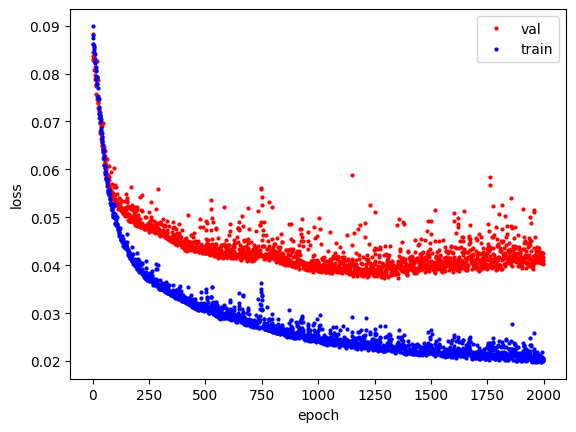

In [29]:
# 훈련 세트 검증 세트 오차(손실) 그래프 시각화
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

import numpy as np
x_len = np.arange(len(y_loss))

import matplotlib.pyplot as plt
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='val')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='train')
# "o" 매개변수는 데이터 포인트를 원 모양의 마커로 표시함

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 학습이 진행될수록 훈련 세트의 손실은 감소하지만 검증 세트의 손실은 다시 커짐!
# 이는 과도한 학습으로 과적합이 발생했기 때문임
# 이를 해결하기 위해 최적의 에포크에서 학습을 자동으로 중단시키는 조기 종료를 배워보자.

# 학습의 자동 중단

* 케라스 API는 EarlyStopping() 함수를 제공한다.

* 학습이 진행되어도 테스트 세트의 오차가 줄어들지 않으면
<br> 학습을 자동으로 멈추게 하는 조기 종료 함수이다.

* 이를 조금 전의 ModelCheckpoint() 함수와 함께 사용해 보며
<br> 최적의 모델을 저장해 보자.

In [24]:
# 조기 종료 함수 임포트
from tensorflow.keras.callbacks import EarlyStopping

# 조기 종료 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# monitor 매개변수는 model.fit()의 실행 결과 중 어느 것을 이용할지 정함
# patience 매개변수는 지정된 값이 몇 번 이상 향상되지 않으면 학습을 종료시킬지 정함

# 최고의 모델이 저장될 폴더와 모델 이름 설정
modelpath = "./data/model/Ch14-4-bestmodel.keras"

# 최고의 모델 업데이트 및 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=0, save_best_only=True)
# save_best_only 매개변수를 True로 설정하면, 최고의 모델 하나만 저장함

#모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split=0.25, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

# 29번째 에포크에서 학습이 종료되었고, model 폴더에 모델이 저장되었음

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9958 - loss: 0.0203 - val_accuracy: 0.9900 - val_loss: 0.0427
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9951 - loss: 0.0174 - val_accuracy: 0.9900 - val_loss: 0.0419
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9953 - loss: 0.0161 - val_accuracy: 0.9908 - val_loss: 0.0438
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9939 - loss: 0.0244 - val_accuracy: 0.9900 - val_loss: 0.0502
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9930 - loss: 0.0264 - val_accuracy: 0.9908 - val_loss: 0.0419
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9936 - loss: 0.0184 - val_accuracy: 0.9908 - val_loss: 0.0407
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9951 - loss: 0.0222 - val_accuracy: 0.9915 - val_loss: 0.0418
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9937 - loss: 0.0244 - val_accuracy: 0.9915 - va

In [31]:
# 모델 테스트 실행
score = model.evaluate(X_test, y_test)

print('Train accuracy:', history.history['accuracy'][-1])
print('Test accuracy:', score[1])

# 정확도가 약 98%로 성능이 크게 향상되었음을 알 수 있다!

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9861 - loss: 0.0778 
Train accuracy: 0.9940980076789856
Test accuracy: 0.9876922965049744


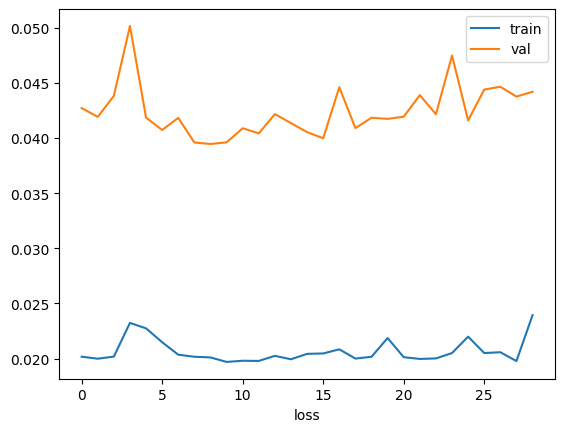

In [30]:
# 훈련 세트 검증 세트 오차(손실) 그래프 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.xlabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 그래프가 요동치고 둘 사이의 간격을 보아, 학습률 조정 및 규제 적용과 데이터 증강을 해야할 것 같아 보임